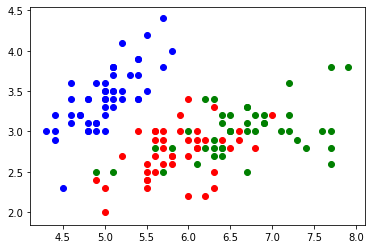

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

data = np.loadtxt("dataSets/ldaData.txt")

c1 = np.array(data[:50])
c2 = np.array(data[50:93])
c3 = np.array(data[93:])

plt.scatter(c1.T[0], c1.T[1], color='blue')
plt.scatter(c2.T[0], c2.T[1], color='red')
plt.scatter(c3.T[0], c3.T[1], color='green')

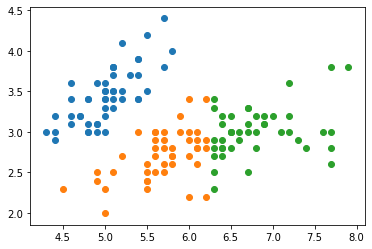

In [2]:
class LDA:
    def __init__(self, classes):
        self.classes = classes
        self.means = [self.mean(c) for c in classes]
        self.cov = self.covariance()
        self.priors = [self.prior(c) for c in classes]
        
        
    def class_of_x(self, x):
        best_class_index = -1
        best_class = None
        highest_disc = float('-inf')
        decision_boundary = False
        for index, cl in enumerate(self.classes):
            disc_cl = self.discriminant(x, self.priors[index], self.means[index])
            if disc_cl > highest_disc:
                best_class_index = index
                best_class = cl
                highest_disc = disc_cl
                decision_boundary = False
            elif disc_cl == highest_disc:
                decision_boundary = True
        if decision_boundary:
            return -1, None
        else:
            return best_class_index, best_class
            
    def mean(self, c):
        return sum(c) / len(c)
    
    def covariance(self):
        total_samples = sum([len(c) for c in self.classes])
        return sum([sum([(x - self.mean(c))@(x-self.mean(c)).T for x in c]) for c in self.classes]) / (total_samples - len(self.classes))
        
    def prior(self, c):
        total_samples = sum([len(c) for c in self.classes])
        return len(c) / total_samples
    
    def discriminant(self, x, prior_c, mean_c):
        return log(prior_c) - 0.5 * mean_c.T@np.linalg.inv(self.cov)@mean_c + x.T@np.linalg.inv(self.cov)@mean_c


c1.shape = (c1.shape[0], c1.shape[1], 1)
c2.shape = (c2.shape[0], c2.shape[1], 1)
c3.shape = (c3.shape[0], c3.shape[1], 1)
classes = [c1, c2, c3]
    
lda = LDA(classes)

class_points =[[], [], [], []]

for x in data:
    i, _ = lda.class_of_x(x)
    class_points[i].append(x)

for c_i in class_points:
    if not c_i:
        continue
    c_i_np = np.array(c_i)
    plt.scatter(c_i_np.T[0], c_i_np.T[1])


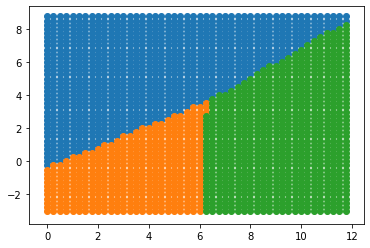

In [3]:
plotspace = np.mgrid[0:12:0.25, -3:9:0.25].reshape(2, -1).T # linspace for 2D

class_points =[[], [], [], []]

for x in plotspace:
    i, _ = lda.class_of_x(x)
    class_points[i].append(x)

for c_i in class_points:
    if not c_i:
        continue
    c_i_np = np.array(c_i)
    plt.scatter(c_i_np.T[0], c_i_np.T[1])